# Fraudulent Activities

### OBJECTIF

Les sites de E-commerce font transiter beaucoup d'argent. Cela peut engendrer des risques non négligeables d'activités frauduleuses, comme l'utilisation de carte de crédit volées, du blanchiment d'argent, etc.

Fort heureusement, le Machine Learning peut nous aider à identifier ces activités frauduleuses. Tous les sites web où vous devez entrer vos informations de paiements ont une équipe qui s'occupe de gérer les risques de fraude via le ML.

Le but de ce challenge est de construire un modèle qui vous permet de prédire une probabilité de transaction frauduleuse.

### DESCRIPTION

L'entreprise X fait du E-commerce et vend des vêtements faits-main. Le but est de construire un modèle qui permette de prédire si l'achat d'un vêtement doit être considéré comme une transaction frauduleuse ou non.

Liste des tâches :

1. Pour chacun des utilisateurs, déterminez le pays d'origine depuis son adresse IP

2. Construisez un modèle qui permette de prédire si l'activité est frauduleuse ou non.

3. Votre patron aimerait comprendre votre modèle car il est inquiet d'utiliser un modèle _black box_. Comment l'expliqueriez vous d'un point utilisateur, et non pas mathématique. Par exemple, quels sont les utilisateurs qui peuvent être classés comme _risqués_ ?

4. Supposons que vous pouvez utiliser votre modèle en live pour qu'il fasse sa prédiction en temps réel. D'un point de vue Produit, comment l'utiliseriez-vous ? Comment pourriez-vous penser l'expérience utilisateur face à ce produit ?



# 1 - Entrainer des algorithmes simples sur les données avec un preprocessing minimal

## Import of libraries and loading dataset

In [5]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn
from sklearn.svm import SVC 
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.tree import DecisionTreeClassifier

- Removing any warnings messages 

In [4]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
from google.colab import files
files.upload()

In [6]:
data = pd.read_csv('Fraud_Data.csv')
ipAdd = pd.read_csv('IpAddress_to_Country.csv')

In [ ]:
data.head()

,user_id,signup_time,purchase_time,purchase_value,device_id,source,browser,sex,age,ip_address,class
0,22058,2015-02-24 22:55:49,2015-04-18 02:47:11,34,QVPSPJUOCKZAR,SEO,Chrome,M,39,7.327584e+08,0
1,333320,2015-06-07 20:39:50,2015-06-08 01:38:54,16,EOGFQPIZPYXFZ,Ads,Chrome,F,53,3.503114e+08,0
2,1359,2015-01-01 18:52:44,2015-01-01 18:52:45,15,YSSKYOSJHPPLJ,SEO,Opera,M,53,2.621474e+09,1
3,150084,2015-04-28 21:13:25,2015-05-04 13:54:50,44,ATGTXKYKUDUQN,SEO,Safari,M,41,3.840542e+09,0
4,221365,2015-07-21 07:09:52,2015-09-09 18:40:53,39,NAUITBZFJKHWW,Ads,Safari,M,45,4.155831e+08,0


In [ ]:
ipAdd.head()

,lower_bound_ip_address,upper_bound_ip_address,country
0,16777216.0,16777471,Australia
1,16777472.0,16777727,China
2,16777728.0,16778239,China
3,16778240.0,16779263,Australia
4,16779264.0,16781311,China


## Dataset basic features enginering

### Removing columns

In [7]:
data = data.drop(["user_id", "device_id", "signup_time", "purchase_time", "ip_address"], axis = 1)
data.head()

,purchase_value,source,browser,sex,age,class
0,34,SEO,Chrome,M,39,0
1,16,Ads,Chrome,F,53,0
2,15,SEO,Opera,M,53,1
3,44,SEO,Safari,M,41,0
4,39,Ads,Safari,M,45,0


### Separating features from target variable class

In [8]:
X = data.loc[:,data.columns != 'class']
y = data.loc[:,data.columns == 'class']

### Train test split & encoding & features scaling

In [9]:
from sklearn.preprocessing import  StandardScaler

In [10]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=42, stratify = y )

In [11]:
X_train = pd.get_dummies(X_train, drop_first=True)
X_test = pd.get_dummies(X_test, drop_first=True)

In [12]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

---

##  Model's training & performance assessment

####  Modèle 1

In [13]:
from sklearn.linear_model import LogisticRegressionCV
from sklearn.metrics import f1_score, accuracy_score

In [14]:
y_test1 = pd.DataFrame(y_test.copy())

In [17]:
#Modèle 1
#LogisticRegressionCV
Logistic_CV = LogisticRegressionCV(cv=10, solver='liblinear',  n_jobs=-1, class_weight = {0:1,1:4} )
%time Logistic_CV.fit(X_train_scaled, y_train)
y_test_pred1 = Logistic_CV.predict(X_test_scaled)
print('accuracy_score : ', accuracy_score(y_test1, y_test_pred1))
print('f1_score : ', f1_score(y_test1, y_test_pred1))

CPU times: user 191 ms, sys: 19.7 ms, total: 211 ms
Wall time: 8.17 s
accuracy_score :  0.9063616711518948
f1_score :  0.0


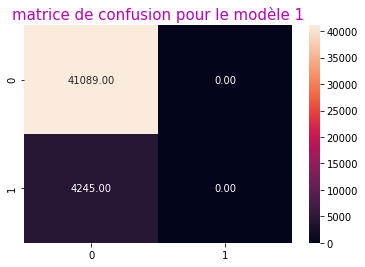

In [18]:
#Matrice de confusion modèle 1
from sklearn.metrics import confusion_matrix
model1 = confusion_matrix(y_test1, y_test_pred1)
sns.heatmap(model1, annot=True, fmt='.2f' )
plt.title('matrice de confusion pour le modèle 1', fontsize = 15, color='m')
plt.show()

####   Modèle 2 


In [19]:
#Modèle 2
#DecisionTree(entropy)
Tree_gini = DecisionTreeClassifier(criterion='entropy')
%time Tree_gini.fit(X_train_scaled, y_train)
y_test_pred2 = Tree_gini.predict(X_test_scaled)
print('accuracy_score : ', accuracy_score(y_test1, y_test_pred2))
print('f1_score : ', f1_score(y_test1, y_test_pred2))

CPU times: user 256 ms, sys: 2.51 ms, total: 259 ms
Wall time: 285 ms
accuracy_score :  0.9130233378920898
f1_score :  0.4990471350527252


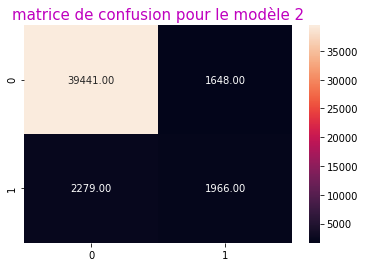

In [ ]:
from sklearn.metrics import confusion_matrix
model2 = confusion_matrix(y_test1, y_test_pred2)
sns.heatmap(model2, annot=True, fmt='.2f' )
plt.title('matrice de confusion pour le modèle 2', fontsize = 15, color='m')
plt.show()

####  Modèle 3

In [ ]:
#Modèle 3
#Random Forest(100)
from sklearn.ensemble import RandomForestClassifier
Forest_100 = RandomForestClassifier()
%time Forest_100.fit(X_train_scaled, y_train)
y_test_pred3 = Forest_100.predict(X_test_scaled)
print('accuracy_score : ', accuracy_score(y_test1, y_test_pred3))
print('f1_score : ', f1_score(y_test1, y_test_pred3))

CPU times: user 7.87 s, sys: 180 ms, total: 8.05 s
Wall time: 8.05 s
accuracy_score :  0.9196408876340054
f1_score :  0.5252182979277987


  -  **Visualization of confusion matrix**

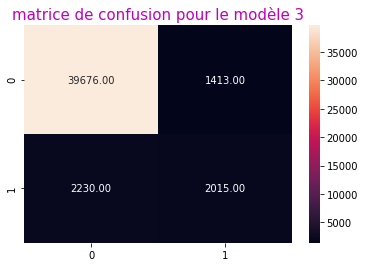

In [ ]:
model3 = confusion_matrix(y_test1, y_test_pred3)
sns.heatmap(model3, annot=True, fmt='.2f' )
plt.title('matrice de confusion pour le modèle 3', fontsize =15, color='m')
plt.show()

#### Modèle 4

In [ ]:
#Modèle 4
#Random Forest(50)
#from sklearn.ensemble import RandomForestClassifier
Forest_50 = RandomForestClassifier(n_estimators=50, n_jobs=-1)
%time Forest_50.fit(X_train_scaled, y_train)
y_test_pred4 = Forest_50.predict(X_test_scaled)
print('accuracy_score : ', accuracy_score(y_test1, y_test_pred4))
print('f1_score : ', f1_score(y_test1, y_test_pred4))

CPU times: user 5.87 s, sys: 87.9 ms, total: 5.96 s
Wall time: 3.15 s
accuracy_score :  0.9196850046322849
f1_score :  0.5241144948372762


  -  **Visualization of confusion matrix**

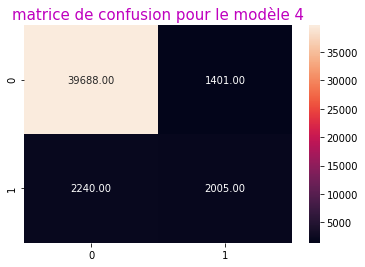

In [ ]:
model4 = confusion_matrix(y_test1, y_test_pred4)
sns.heatmap(model4, annot=True, fmt='.2f' )
plt.title('matrice de confusion pour le modèle 4', fontsize=15, color='m')
plt.show()

### - GridSearchCV for finding model's best hyperparameters 

In [ ]:
#GridSearchCV
from sklearn.model_selection import GridSearchCV
random_grid = RandomForestClassifier()
params = {"n_estimators": range(20, 50, 100),
          'max_depth' : [4,6,8,10],
          'max_features':[2,3,4] }

grid = GridSearchCV(cv=10, estimator = random_grid, param_grid = params, n_jobs=-1 )
%time grid.fit(X_train_scaled, y_train)

CPU times: user 2.22 s, sys: 202 ms, total: 2.43 s
Wall time: 1min 16s


GridSearchCV(cv=10, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False,
                                              rand

In [ ]:
grid.best_params_

{'max_depth': 10, 'max_features': 3, 'n_estimators': 20}

In [ ]:
grid.best_estimator_.score(X_test_scaled, y_test)

0.9074866546080205

#### Modèle 5

In [ ]:
#Modèle 5
#gridsearch(best params)
gridsearch = RandomForestClassifier(n_estimators=20, max_depth=10, max_features=3)
%time gridsearch.fit(X_train_scaled, y_train)

CPU times: user 1.12 s, sys: 6.58 ms, total: 1.12 s
Wall time: 1.13 s


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=10, max_features=3,
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=20,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [ ]:
y_test_pred5 = gridsearch.predict(X_test_scaled)
print('accuracy_score : ', accuracy_score(y_test1, y_test_pred5))
print('f1_score : ', f1_score(y_test1, y_test_pred5))

accuracy_score :  0.9074866546080205
f1_score :  0.02961591855622397


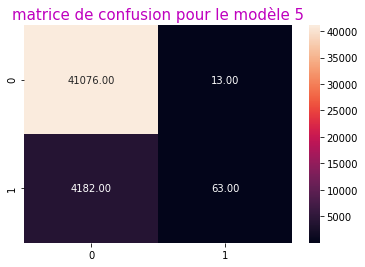

In [ ]:
model5 = confusion_matrix(y_test1, y_test_pred5)
sns.heatmap(model5, annot=True, fmt='.2f' )
plt.title('matrice de confusion pour le modèle 5', fontsize=15, color='m')
plt.show()

---

# 2 - Entrainer un algorithme simple sur les données avec un preprocessing plus avancé: 

##  Loading dataset

In [20]:
data = pd.read_csv("Fraud_Data.csv")
data.head()

,user_id,signup_time,purchase_time,purchase_value,device_id,source,browser,sex,age,ip_address,class
0,22058,2015-02-24 22:55:49,2015-04-18 02:47:11,34,QVPSPJUOCKZAR,SEO,Chrome,M,39,7.327584e+08,0
1,333320,2015-06-07 20:39:50,2015-06-08 01:38:54,16,EOGFQPIZPYXFZ,Ads,Chrome,F,53,3.503114e+08,0
2,1359,2015-01-01 18:52:44,2015-01-01 18:52:45,15,YSSKYOSJHPPLJ,SEO,Opera,M,53,2.621474e+09,1
3,150084,2015-04-28 21:13:25,2015-05-04 13:54:50,44,ATGTXKYKUDUQN,SEO,Safari,M,41,3.840542e+09,0
4,221365,2015-07-21 07:09:52,2015-09-09 18:40:53,39,NAUITBZFJKHWW,Ads,Safari,M,45,4.155831e+08,0


In [21]:
ipAdd = pd.read_csv("IpAddress_to_Country.csv")
ipAdd.head()

,lower_bound_ip_address,upper_bound_ip_address,country
0,16777216.0,16777471,Australia
1,16777472.0,16777727,China
2,16777728.0,16778239,China
3,16778240.0,16779263,Australia
4,16779264.0,16781311,China


##  Dataset advanced features enginering

- Creating **ip_to_country** function that takes an IP address as argument and returns country associated based on IP_table

In [22]:
def ip_to_country(ip=None):
    try :
        return ipAdd.country[(ipAdd.lower_bound_ip_address <= ip) 
                             & (ipAdd.upper_bound_ip_address >= ip)].iloc[0]
    except IndexError :
        return "Unknown"     
# To affect a country to each IP :
%time data["ip_country"] = data.ip_address.apply(ip_to_country)

CPU times: user 2min 39s, sys: 60.4 ms, total: 2min 39s
Wall time: 2min 39s


In [23]:
data.head()

,user_id,signup_time,purchase_time,purchase_value,device_id,source,browser,sex,age,ip_address,class,ip_country
0,22058,2015-02-24 22:55:49,2015-04-18 02:47:11,34,QVPSPJUOCKZAR,SEO,Chrome,M,39,7.327584e+08,0,Japan
1,333320,2015-06-07 20:39:50,2015-06-08 01:38:54,16,EOGFQPIZPYXFZ,Ads,Chrome,F,53,3.503114e+08,0,United States
2,1359,2015-01-01 18:52:44,2015-01-01 18:52:45,15,YSSKYOSJHPPLJ,SEO,Opera,M,53,2.621474e+09,1,United States
3,150084,2015-04-28 21:13:25,2015-05-04 13:54:50,44,ATGTXKYKUDUQN,SEO,Safari,M,41,3.840542e+09,0,Unknown
4,221365,2015-07-21 07:09:52,2015-09-09 18:40:53,39,NAUITBZFJKHWW,Ads,Safari,M,45,4.155831e+08,0,United States


- Converting dataset date columns into **datetime type**

In [24]:
from datetime import datetime, time

In [25]:
data.signup_time = data.signup_time.apply(lambda x : datetime.strptime(x, '%Y-%m-%d %H:%M:%S').date())
data.purchase_time = data.purchase_time.apply(lambda x : datetime.strptime(x, '%Y-%m-%d %H:%M:%S').date())

- Creating new column *delta_signup_purchase* by getting the time laps between *signup_time* and *purchase_time* columns newly converted into datetime date type

In [26]:
data['delta_signup_purchase'] = data.purchase_time - data.signup_time

In [27]:
data.head()

,user_id,signup_time,purchase_time,purchase_value,device_id,source,browser,sex,age,ip_address,class,ip_country,delta_signup_purchase
0,22058,2015-02-24,2015-04-18,34,QVPSPJUOCKZAR,SEO,Chrome,M,39,7.327584e+08,0,Japan,53 days
1,333320,2015-06-07,2015-06-08,16,EOGFQPIZPYXFZ,Ads,Chrome,F,53,3.503114e+08,0,United States,1 days
2,1359,2015-01-01,2015-01-01,15,YSSKYOSJHPPLJ,SEO,Opera,M,53,2.621474e+09,1,United States,0 days
3,150084,2015-04-28,2015-05-04,44,ATGTXKYKUDUQN,SEO,Safari,M,41,3.840542e+09,0,Unknown,6 days
4,221365,2015-07-21,2015-09-09,39,NAUITBZFJKHWW,Ads,Safari,M,45,4.155831e+08,0,United States,50 days


In [28]:
data.shape

(151112, 13)

In [29]:
round(data['class'].value_counts(normalize=True).mul(100),2)

0    90.64
1     9.36
Name: class, dtype: float64

- Environ 10% des transactions sont frauduleuses

In [ ]:
data['ip_address'].value_counts(ascending=False)

3.874758e+09    20
5.760609e+08    20
2.050964e+09    20
1.502818e+09    20
2.937899e+09    19
                ..
1.101289e+09     1
2.730533e+09     1
3.912052e+09     1
3.192721e+09     1
2.991295e+09     1
Name: ip_address, Length: 143512, dtype: int64

In [ ]:
data.device_id.value_counts(ascending=False)

EQYVNEGOFLAWK    20
ZUSVMDEZRBDTX    20
ITUMJCKWEYNDD    20
NGQCKIADMZORL    20
KIPFSCNUGOLDP    20
                 ..
VGIAOAYATPRYG     1
SCXHXTRVDLAGH     1
SOSFJBDJNTUJV     1
LSOIWJMIMHNAA     1
JMWLGTNKCYLDJ     1
Name: device_id, Length: 137956, dtype: int64

In [ ]:
data.head()

,user_id,signup_time,purchase_time,purchase_value,device_id,source,browser,sex,age,ip_address,class,ip_country,delta_signup_purchase
0,22058,2015-02-24,2015-04-18,34,QVPSPJUOCKZAR,SEO,Chrome,M,39,7.327584e+08,0,Japan,53 days
1,333320,2015-06-07,2015-06-08,16,EOGFQPIZPYXFZ,Ads,Chrome,F,53,3.503114e+08,0,United States,1 days
2,1359,2015-01-01,2015-01-01,15,YSSKYOSJHPPLJ,SEO,Opera,M,53,2.621474e+09,1,United States,0 days
3,150084,2015-04-28,2015-05-04,44,ATGTXKYKUDUQN,SEO,Safari,M,41,3.840542e+09,0,Unknown,6 days
4,221365,2015-07-21,2015-09-09,39,NAUITBZFJKHWW,Ads,Safari,M,45,4.155831e+08,0,United States,50 days


- Removing *user_id, signup_time, purchase_time, device_id and ip_address* columns from dataset before machine learning

In [30]:
df1 = data.drop(['user_id', 'signup_time', 'purchase_time', 'device_id', 'ip_address'], axis =1)
df1.head()

,purchase_value,source,browser,sex,age,class,ip_country,delta_signup_purchase
0,34,SEO,Chrome,M,39,0,Japan,53 days
1,16,Ads,Chrome,F,53,0,United States,1 days
2,15,SEO,Opera,M,53,1,United States,0 days
3,44,SEO,Safari,M,41,0,Unknown,6 days
4,39,Ads,Safari,M,45,0,United States,50 days


- Filtering dataset on *ip_country* column where the country is not  **Unknows** 

In [31]:
df2 = df1[df1['ip_country']!='Unknown']

**Removing word << days >> from *delta_signup_purchase* column data :**

1. Converting *delta_signup_purchase* column into string in order to use **str function**
2. Apply **split function** to *delta_signup_purchase* column in order to split column data, will return a list
3. Take the first argument on this list witch should the number of day
4. Convert this number of day into integer

In [32]:
df2.delta_signup_purchase = df2.delta_signup_purchase.apply(lambda x: str(x))

In [33]:
df2.delta_signup_purchase = df2.delta_signup_purchase.apply(lambda x: x.split(" "))

In [34]:
df2.delta_signup_purchase = df2.delta_signup_purchase.apply(lambda x: x[0])

In [35]:
df2.delta_signup_purchase = df2.delta_signup_purchase.apply(lambda x: int(x))

In [36]:
df2.head()

,purchase_value,source,browser,sex,age,class,ip_country,delta_signup_purchase
0,34,SEO,Chrome,M,39,0,Japan,53
1,16,Ads,Chrome,F,53,0,United States,1
2,15,SEO,Opera,M,53,1,United States,0
4,39,Ads,Safari,M,45,0,United States,50
5,42,Ads,Chrome,M,18,0,Canada,49


---

## Data Visulization

In [ ]:
df2.head()

,purchase_value,source,browser,sex,age,class,ip_country,delta_signup_purchase
0,34,SEO,Chrome,M,39,0,Japan,53
1,16,Ads,Chrome,F,53,0,United States,1
2,15,SEO,Opera,M,53,1,United States,0
4,39,Ads,Safari,M,45,0,United States,50
5,42,Ads,Chrome,M,18,0,Canada,49


#### Visualization of fraud according to age

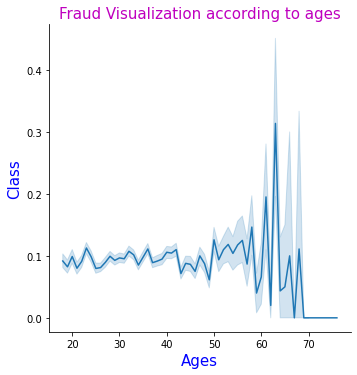

In [ ]:
# Visualisation  des fraudes en fonction de l'âge 
sns.relplot(data = df2, y = 'class', x = 'age', kind='line')
plt.title('Fraud Visualization according to ages', fontsize =15, color='m')
plt.xlabel("Ages", fontsize=15, color='b')
plt.ylabel("Class", fontsize=15, color='b' )

plt.show()

#### Visualization of fraud according to age with focus on ages greater or equal to 55 

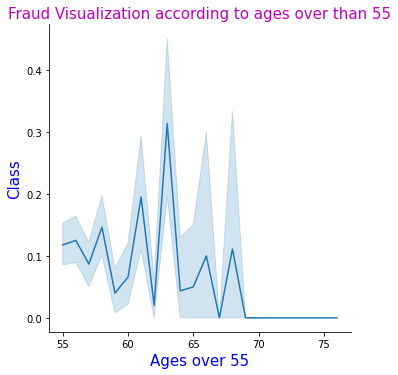

In [ ]:
# Visualisation  des fraudes en fonction de l'âge supérieur ou égale à 55 ans 
sns.relplot(data = df2.query('age>=55'), y = 'class', x = 'age', kind='line')
plt.title('Fraud Visualization according to ages over than 55', fontsize=15, color='m')
plt.xlabel("Ages over 55", fontsize=15, color='b')
plt.ylabel("Class", fontsize=15, color='b' )
plt.show()

- Nous observons un risque de transactions frauduleuses relativement elevé dans la tranche d'âge de 62 à 68 ans et décroit au délas.



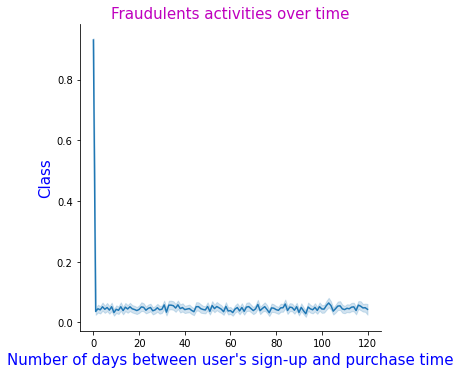

In [ ]:
sns.relplot(data = df2, y = 'class', x = 'delta_signup_purchase', kind='line')
plt.title('Fraudulents activities over time', fontsize=15, color='m' )
plt.xlabel("Number of days between user's sign-up and purchase time", fontsize=15, color='b')
plt.ylabel("Class", fontsize=15, color='b' )
plt.show()

#### Visualization of fraudulent activities in time timeline

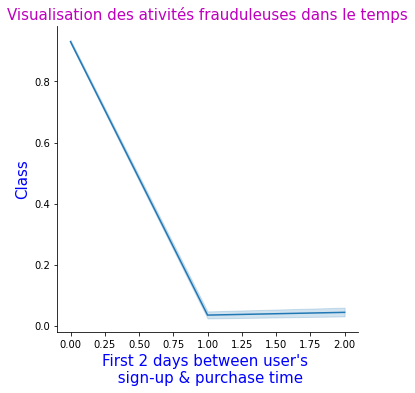

In [ ]:
sns.relplot(data = df2.query('delta_signup_purchase<2.5'), y = 'class', x = 'delta_signup_purchase', kind='line')
plt.title('Visualisation des ativités frauduleuses dans le temps', fontsize=15, color='m')
plt.xlabel("First 2 days between user's \n sign-up & purchase time", fontsize=15, color='b')
plt.ylabel("Class", fontsize=15, color='b' )

plt.show()

- Le risque de fraude est fortement accru dans les premières 24h suivant l'inscription de l'utilisateur et s'attenu par la suite.

### Visualization  of fraud according to countries

#### Processing data for map

In [ ]:
df2.head()

,purchase_value,source,browser,sex,age,class,ip_country,delta_signup_purchase
0,34,SEO,Chrome,M,39,0,Japan,53
1,16,Ads,Chrome,F,53,0,United States,1
2,15,SEO,Opera,M,53,1,United States,0
4,39,Ads,Safari,M,45,0,United States,50
5,42,Ads,Chrome,M,18,0,Canada,49


In [ ]:
!pip install shapely
!pip install geopandas

In [ ]:
import geopandas

- Loading world map dataset througt geopandas 

In [ ]:
world_map = geopandas.read_file(geopandas.datasets.get_path("naturalearth_lowres"))
world_map.head()

,pop_est,continent,name,iso_a3,gdp_md_est,geometry
0,920938,Oceania,Fiji,FJI,8374.0,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000..."
1,53950935,Africa,Tanzania,TZA,150600.0,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982..."
2,603253,Africa,W. Sahara,ESH,906.5,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948..."
3,35623680,North America,Canada,CAN,1674000.0,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742..."
4,326625791,North America,United States of America,USA,18560000.0,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000..."


- Creating a new dataset for map with *country_name and the count of Number_of_fraud*

In [ ]:
df3_for_map = pd.DataFrame({'country_name':df2[df2['class']==1].ip_country.value_counts().index, 'Number_of_fraud':df2[df2['class']==1].ip_country.value_counts().values}) 

In [ ]:
df3_for_map.head()

,country_name,Number_of_fraud
0,United States,5551
1,China,1043
2,Japan,715
3,United Kingdom,477
4,Korea Republic of,380


Some countries name on world_map dataset dosen't match  with the corresponding  countrie's name in our new dataset created ( df3_for_map ) , so i just made changes for United States where i used **map function** to get a match.

In [ ]:
df3_for_map.country_name = df3_for_map.country_name.apply(lambda x: 'United States of America' if x=='United States'
                      else x)

- Merging datasets world_map and df3_for_map

In [ ]:
merged_for_map = world_map.merge(df3_for_map, left_on = 'name', right_on = 'country_name')

merging result

In [ ]:
merged_for_map.head()

,pop_est,continent,name,iso_a3,gdp_md_est,geometry,country_name,Number_of_fraud
0,35623680,North America,Canada,CAN,1674000.0,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742...",Canada,348
1,326625791,North America,United States of America,USA,18560000.0,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000...",United States of America,5551
2,18556698,Asia,Kazakhstan,KAZ,460700.0,"POLYGON ((87.35997 49.21498, 86.59878 48.54918...",Kazakhstan,6
3,29748859,Asia,Uzbekistan,UZB,202300.0,"POLYGON ((55.96819 41.30864, 55.92892 44.99586...",Uzbekistan,2
4,260580739,Asia,Indonesia,IDN,3028000.0,"MULTIPOLYGON (((141.00021 -2.60015, 141.01706 ...",Indonesia,57


### Visualization  of fraud according to country

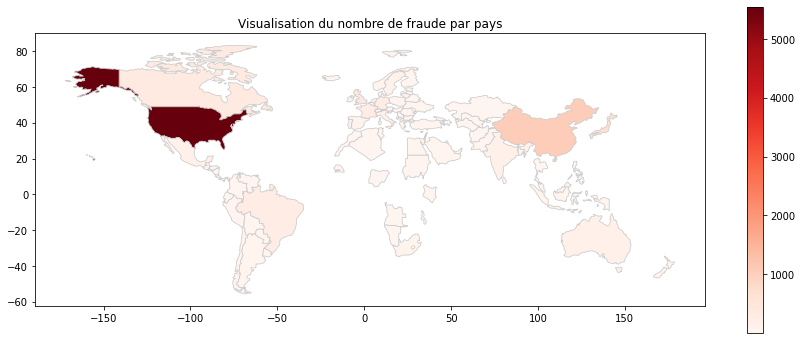

In [ ]:
# set a variable that will call whatever column we want to visualise on the map
variable = 'Number_of_fraud'
# set the range for the choropleth
vmin, vmax = 120, 220
# create figure and axes for Matplotlib
fig, ax = plt.subplots(1, figsize=(15, 6))
merged_for_map.plot(column=variable, cmap='Reds', linewidth=0.8, ax=ax, edgecolor='0.8', legend = True)
plt.title('Visualisation du nombre de fraude par pays')
plt.show()

**Les USA, la chine et le Japon sont le Top 3 des pays ayant le plus de fraudeurs.**

---

##  Model's training & performance assessment

In [ ]:
df2.head()

,purchase_value,source,browser,sex,age,class,ip_country,delta_signup_purchase
0,34,SEO,Chrome,M,39,0,Japan,53
1,16,Ads,Chrome,F,53,0,United States,1
2,15,SEO,Opera,M,53,1,United States,0
4,39,Ads,Safari,M,45,0,United States,50
5,42,Ads,Chrome,M,18,0,Canada,49


In [37]:
X = df2.loc[:,df2.columns != 'class']
y = df2.loc[:,df2.columns == 'class']

In [38]:
X= pd.get_dummies(X, drop_first=True)

- **Train test split**

In [39]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=42, stratify = y )

- **Features scaling using StandardScaler**

In [40]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler(with_mean=False)
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [41]:
y_test2 = pd.DataFrame(y_test.copy())
y_test2.head()

,class
136062,0
64266,0
128561,0
135214,0
25392,0


#### Modèle 6

In [ ]:
#LogisticRegressionCV
from sklearn.metrics import f1_score, accuracy_score
Logistic_CV = LogisticRegressionCV(cv=10, solver='liblinear',  n_jobs=-1, class_weight = {0:1,1:4} )
%time Logistic_CV.fit(X_train_scaled, y_train)
y_test_pred6 = Logistic_CV.predict(X_test_scaled)
print('accuracy_score : ', accuracy_score(y_test2, y_test_pred6))
print('f1_score : ', f1_score(y_test2, y_test_pred6))

CPU times: user 477 ms, sys: 369 ms, total: 846 ms
Wall time: 36.5 s
accuracy_score :  0.9099989675820772
f1_score :  0.530749562642982


  -  **Visualization of confusion matrix**

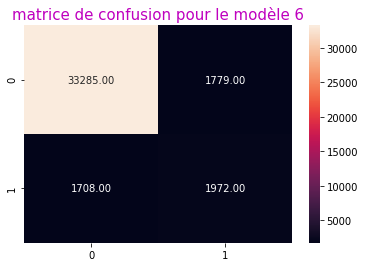

In [ ]:
from sklearn.metrics import confusion_matrix
model6 = confusion_matrix(y_test2, y_test_pred6)
sns.heatmap(model6, annot=True, fmt='.2f' )
plt.title('matrice de confusion pour le modèle 6', fontsize=15, color='m')
plt.show()

#### Modèle 7

In [ ]:
#DecisionTree(entropy)
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import f1_score, accuracy_score
Tree_entropy = DecisionTreeClassifier(criterion='entropy')
%time Tree_entropy.fit(X_train_scaled, y_train)
y_test_pred7 = Tree_entropy.predict(X_test_scaled)
print('accuracy_score : ', accuracy_score(y_test2, y_test_pred7))
print('f1_score : ', f1_score(y_test2, y_test_pred7))

CPU times: user 2.84 s, sys: 908 µs, total: 2.84 s
Wall time: 2.84 s
accuracy_score :  0.9076760272558332
f1_score :  0.5473870682019487


  -  **Visualization of confusion matrix**

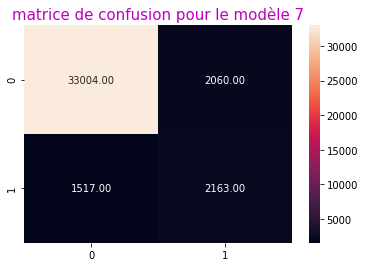

In [ ]:
from sklearn.metrics import confusion_matrix
model7 = confusion_matrix(y_test2, y_test_pred7)
sns.heatmap(model7, annot=True, fmt='.2f' )
plt.title('matrice de confusion pour le modèle 7', fontsize=15, color='m')
plt.show()

#### Modèle 8

In [ ]:
#Random Forest(100)
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score, accuracy_score
Forest_100 = RandomForestClassifier()
%time Forest_100.fit(X_train_scaled, y_train)
y_test_pred8 = Forest_100.predict(X_test_scaled)
print('accuracy_score : ', accuracy_score(y_test2, y_test_pred8))
print('f1_score : ', f1_score(y_test2, y_test_pred8))

CPU times: user 33 s, sys: 46.1 ms, total: 33 s
Wall time: 33 s
accuracy_score :  0.9554253561841833
f1_score :  0.7062425582582073


  -  **Visualization of confusion matrix**

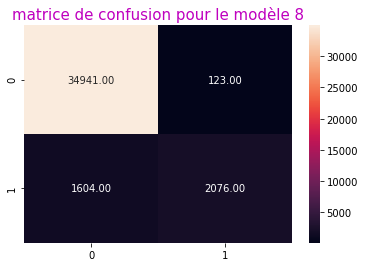

In [ ]:
from sklearn.metrics import confusion_matrix
model8 = confusion_matrix(y_test2, y_test_pred8)
sns.heatmap(model8, annot=True, fmt='.2f' )
plt.title('matrice de confusion pour le modèle 8', fontsize=15, color='m')
plt.show()

#### Modèle 9

In [ ]:
#Random Forest(50)
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score, accuracy_score
Forest_50 = RandomForestClassifier(n_estimators=50, n_jobs=-1)
%time Forest_50.fit(X_train_scaled, y_train)
y_test_pred9 = Forest_50.predict(X_test_scaled)
print('accuracy_score : ', accuracy_score(y_test2, y_test_pred9))
print('f1_score : ', f1_score(y_test2, y_test_pred9))

CPU times: user 24.5 s, sys: 60.6 ms, total: 24.6 s
Wall time: 12.6 s
accuracy_score :  0.9552704934957671
f1_score :  0.7054224035356111


  -  **Visualization of confusion matrix**

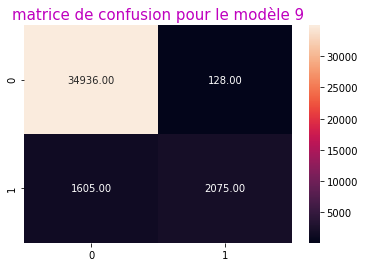

In [ ]:
from sklearn.metrics import confusion_matrix
model9 = confusion_matrix(y_test2, y_test_pred9)
sns.heatmap(model9, annot=True, fmt='.2f' )
plt.title('matrice de confusion pour le modèle 9', fontsize=15, color='m')
plt.show()

### - GridSearchCV for finding model's best hyperparameters 

In [ ]:
#GridSearchCV
from sklearn.model_selection import GridSearchCV
random_grid = RandomForestClassifier()
params = {"n_estimators": range(20, 50, 100),
          'max_depth' : [4,6,8,10],
          'max_features':[2,3,4] }

grid = GridSearchCV(cv=10, estimator = random_grid, param_grid = params, n_jobs=-1 )
%time grid.fit(X_train_scaled, y_train)

CPU times: user 1.93 s, sys: 383 ms, total: 2.31 s
Wall time: 1min 16s


GridSearchCV(cv=10, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False,
                                              rand

In [ ]:
grid.best_params_

{'max_depth': 10, 'max_features': 4, 'n_estimators': 20}

In [ ]:
grid.best_estimator_.score(X_test_scaled, y_test)

0.9076760272558332

#### Modèle 10

In [ ]:
#RandomForestClassifier()
gridsearch2 = RandomForestClassifier(n_estimators=20, max_depth=10, max_features=4)
%time gridsearch2.fit(X_train_scaled, y_train)
y_test_pred10 = gridsearch2.predict(X_test_scaled)
print('accuracy_score : ', accuracy_score(y_test2, y_test_pred10))
print('f1_score : ', f1_score(y_test2, y_test_pred10))

CPU times: user 713 ms, sys: 2.97 ms, total: 716 ms
Wall time: 718 ms
accuracy_score :  0.9051207928969647
f1_score :  0.002171552660152009


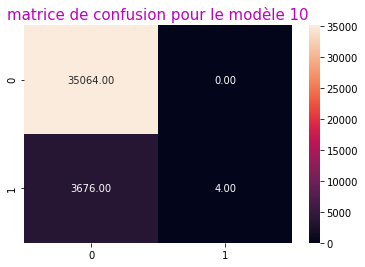

In [ ]:
model10 = confusion_matrix(y_test2, y_test_pred10)
sns.heatmap(model10, annot=True, fmt='.2f' )
plt.title('matrice de confusion pour le modèle 10', fontsize=15, color='m')
plt.show()

---

# 3 - Améliorer la performance de l'algorithme avec du voting, stacking et du boosting.

In [ ]:
# Nous allons continuer avec les mêmes data traité (df2)

In [ ]:
df2.head()

,purchase_value,source,browser,sex,age,class,ip_country,delta_signup_purchase
0,34,SEO,Chrome,M,39,0,Japan,53
1,16,Ads,Chrome,F,53,0,United States,1
2,15,SEO,Opera,M,53,1,United States,0
4,39,Ads,Safari,M,45,0,United States,50
5,42,Ads,Chrome,M,18,0,Canada,49


In [42]:
X = df2.loc[:,df1.columns != 'class']
y = df2.loc[:,df1.columns == 'class']

In [43]:
X= pd.get_dummies(X, drop_first=True)

In [44]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=42, stratify = y )

In [ ]:
!pip install missingpy
from missingpy import KNNImputer
imputer = KNNImputer()

X_train = pd.DataFrame(imputer.fit_transform(X_train), columns=X_train.columns)
X_test = pd.DataFrame(imputer.transform(X_test), columns=X_test.columns)


In [46]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler(with_mean=False)
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [48]:
y_test3 = pd.DataFrame(y_test.copy())
y_test3.tail()

,class
134163,0
72678,0
131925,1
107190,0
55629,0


###  Model's training & performance assessment

#### Modèle 11

In [ ]:
# SVM 
svm = SVC()
%time svm.fit(X_train_scaled, y_train)
y_test_pred11 = svm.predict(X_test_scaled)
print('accuracy_score', accuracy_score(y_test3, y_test_pred11))
print('f1_score', f1_score(y_test3, y_test_pred11))

In [ ]:
from sklearn.metrics import confusion_matrix
model11 = confusion_matrix(y_test3, y_test_pred11)
sns.heatmap(model11, annot=True, fmt='.2f' )
plt.title('matrice de confusion pour le modèle 11', fontsize=15, color='m')
plt.show()

#### Modèle 12

In [51]:
# Voting
from sklearn.ensemble import VotingClassifier, RandomForestClassifier, AdaBoostRegressor, AdaBoostClassifier
voting = VotingClassifier(
    estimators = [
                ("logreg", LogisticRegression()), 
                ("tree", DecisionTreeClassifier()),
                ("Random", RandomForestClassifier()),
                ("Adaboost", AdaBoostClassifier())
                  ],
n_jobs=-1
)

In [52]:
%time voting.fit(X_train_scaled, y_train)
y_test_pred12 = voting.predict(X_test_scaled)
print('accuracy_score : ', accuracy_score(y_test3, y_test_pred12))
print('f1_score : ', f1_score(y_test3, y_test_pred12))

CPU times: user 162 ms, sys: 305 ms, total: 467 ms
Wall time: 36.4 s
accuracy_score :  0.9564835845550279
f1_score :  0.710706932052162


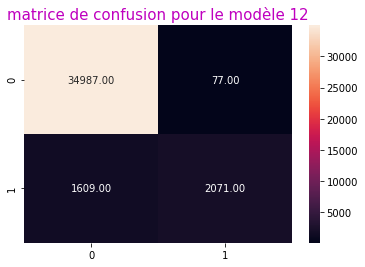

In [53]:
model12 = confusion_matrix(y_test3, y_test_pred12)
sns.heatmap(model12, annot=True, fmt='.2f' )
plt.title('matrice de confusion pour le modèle 12', fontsize=15, color='m')
plt.show()

#### Modèle 13

In [59]:
# Stacking
from sklearn.ensemble import StackingClassifier
stacking = StackingClassifier(
    estimators = [
                ("logreg", LogisticRegression()), 
                ("tree", DecisionTreeClassifier()),
                ("Random", RandomForestClassifier()),
                ("Adaboost", AdaBoostClassifier())
                  ], 
    n_jobs=-1,
    final_estimator=LogisticRegressionCV()
)

In [60]:
%time stacking.fit(X_train, y_train)
y_test_pred13 = stacking.predict(X_test_scaled)
print('accuracy_score : ', accuracy_score(y_test3, y_test_pred13))
print('f1_score : ', f1_score(y_test3, y_test_pred13))

CPU times: user 7.59 s, sys: 5.35 s, total: 12.9 s
Wall time: 3min 1s
accuracy_score :  0.8933254181292587
f1_score :  0.22877402500466507


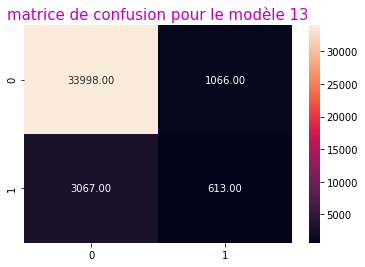

In [61]:
model13 = confusion_matrix(y_test3, y_test_pred13)
sns.heatmap(model13, annot=True, fmt='.2f' )
plt.title('matrice de confusion pour le modèle 13', fontsize=15, color='m')
plt.show()

#### Modèle 14

In [62]:
#AdaBoostRegressor
Adaboost = AdaBoostRegressor()
%time Adaboost.fit(X_train_scaled, y_train)

CPU times: user 6.16 s, sys: 39.6 ms, total: 6.2 s
Wall time: 6.23 s


AdaBoostRegressor(base_estimator=None, learning_rate=1.0, loss='linear',
                  n_estimators=50, random_state=None)

In [63]:
from sklearn.metrics import accuracy_score, f1_score
y_test_pred14 = Adaboost.predict(X_test_scaled)
print('accuracy_score : ', accuracy_score(y_test3, y_test_pred14.round()))
print('f1_score :' , f1_score(y_test3, y_test_pred14.round()))

accuracy_score :  0.9553479248399752
f1_score : 0.7056822048315754


  -  **Visualization of confusion matrix**

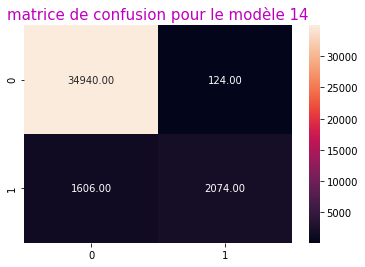

In [65]:
model14 = confusion_matrix(y_test3, y_test_pred14.round())
sns.heatmap(model14, annot=True, fmt='.2f' )
plt.title('matrice de confusion pour le modèle 14', fontsize=15, color='m')
plt.show()

#### Modèle 15

In [66]:
# XGBRegressor: EXtreme Gradient Boosting Regressor
!pip install xgboost
from xgboost import XGBClassifier
XGB_regressor = XGBClassifier(n_jobs=-1, learning_rate=0.8, max_depth= 2, max_features= 2)
%time XGB_regressor.fit(X_train_scaled, y_train)

CPU times: user 33.3 s, sys: 342 ms, total: 33.7 s
Wall time: 18.3 s


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.8, max_delta_step=0, max_depth=2, max_features=2,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=-1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [67]:
# Modèle 15 evaluation 
y_test_pred15 = XGB_regressor.predict(X_test_scaled)
print('accuracy_score : ', accuracy_score(y_test, y_test_pred15))
print('f1_score :' ,f1_score(y_test3, y_test_pred15))

accuracy_score :  0.9553479248399752
f1_score : 0.7056822048315754


  -  **Visualization of confusion matrix**

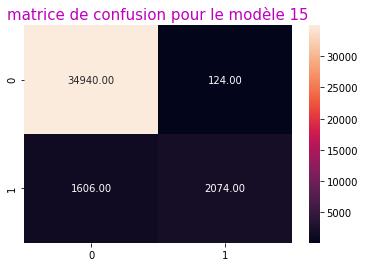

In [68]:
model15 = confusion_matrix(y_test3, y_test_pred15)
sns.heatmap(model15, annot=True, fmt='.2f' )
plt.title('matrice de confusion pour le modèle 15', fontsize=15, color='m')
plt.show()

---

# 4 - Comparaison de la performance des modèles

In [71]:
# Comming soon